In [6]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [7]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [8]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [9]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [10]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)


In [11]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [12]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [13]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [14]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'],c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [15]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'],c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [16]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [17]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()


('2017-08-23',)

In [18]:
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

In [19]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

In [20]:
# Calculate the date one year from the last date in data set.
last_date= dt.date(2017,8,23)
last_year= last_date - dt.timedelta(days = 365)
last_year

datetime.date(2016, 8, 23)

In [21]:
# Perform a query to retrieve the data and precipitation scores
query = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= last_year).all()

In [22]:
# Save the query results as a Pandas DataFrame and set the index to the date column
measurement_df = pd.DataFrame(query,columns =['date','prcp'])

In [23]:
# Use Pandas Plotting with Matplotlib to plot the data
measurement2_df = measurement_df.sort_values(by = ["date"])

Text(0, 0.5, 'Inches')

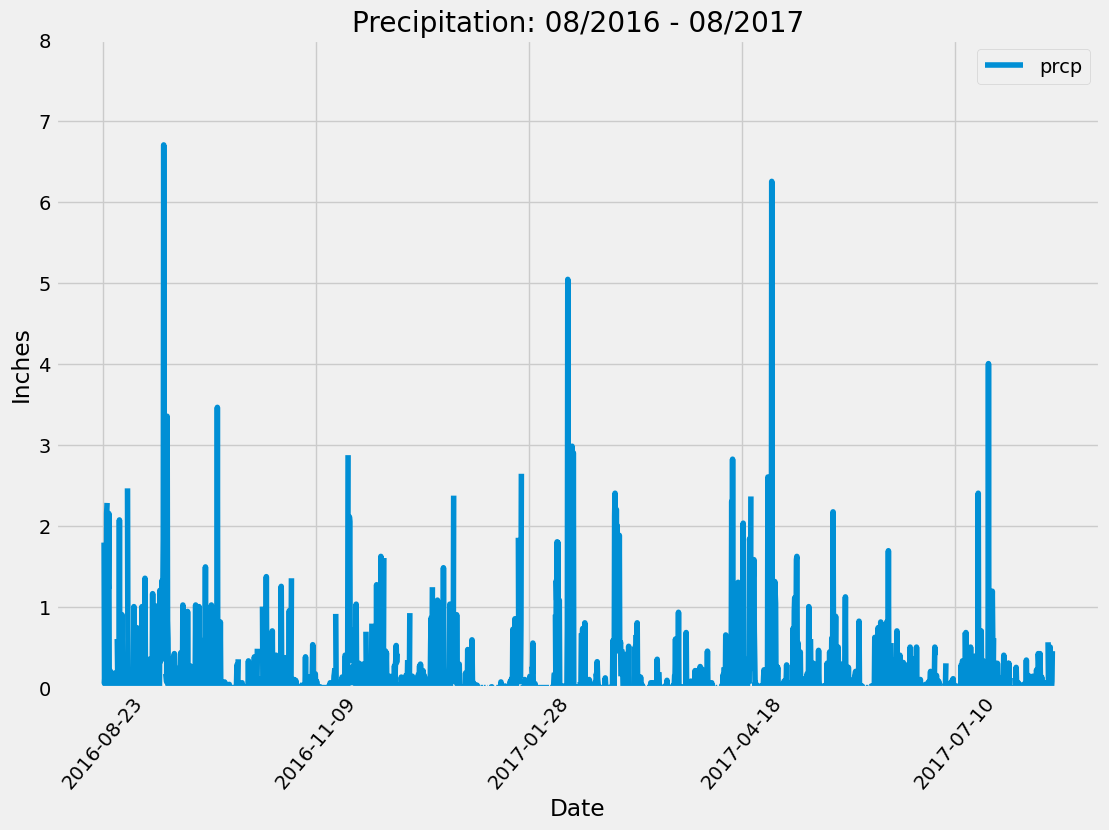

In [24]:
measurement2_df.plot(x='date',y='prcp',title = 'Precipitation: 08/2016 - 08/2017', figsize = (12,8), rot = 50)
plt.legend(loc = 'upper right')
plt.ylim(0, 8)
plt.xlabel('Date')
plt.ylabel('Inches')

In [25]:
# Use Pandas to calcualte the summary statistics for the precipitation data
measurement2_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [26]:
# Design a query to calculate the total number stations in the dataset
sql_query_station_count = session.query(Station).count()
print(sql_query_station_count)


9


In [27]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
activity_desc=session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
print(activity_desc)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [28]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
activity_calc= [Measurement.station,
               func.min(Measurement.tobs),
               func.max(Measurement.tobs),
               func.avg(Measurement.tobs)]
highest_act = session.query(*activity_calc).filter_by(station = "USC00519281").all()

print(f"Lowest temperature for {highest_act[0][0]} is {highest_act[0][1]}, "
      f"Highest temperature is {highest_act[0][2]}"
      f" and average temperature is {highest_act[0][3]}")

Lowest temperature for USC00519281 is 54.0, Highest temperature is 85.0 and average temperature is 71.66378066378067


Text(0.5, 1.0, 'Frequency Distribution')

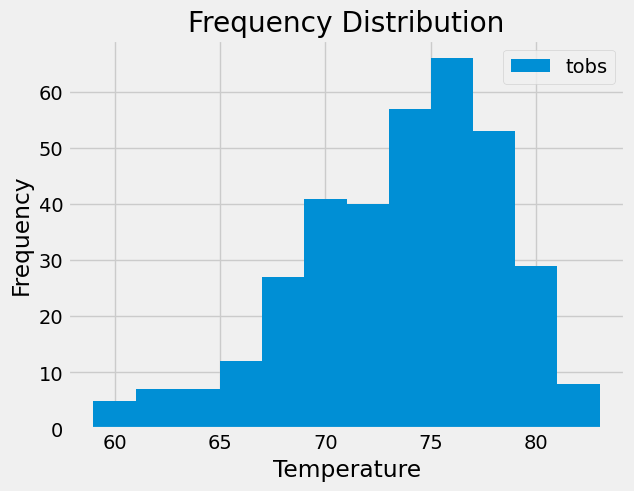

In [29]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
final_12=session.query(Measurement.date, Measurement.tobs).filter_by(station="USC00519281").filter(Measurement.date >= last_year).all()

final_12_df=pd.DataFrame(final_12)

final_12_df.plot.hist(bins = 12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Frequency Distribution')

# Close session

In [30]:
# Close Session
session.close()